 * [Пример моделирования](https://www.kaggle.com/godzill22/house-price-prediction-improved-model-top-8)<br>
 * [Выбор модели](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)<br>

In [2]:
import numpy as np
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy as sp
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
comb = [train_df, test_df]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Функция оценки эффективности моделей
def model_evaluation(algo, algoname):
    """
    This function  fit and  evaluate 
    given algorithm. It takes 2 arguments:
    First: algorithm of a choice without parentheses.
    Second: the name of a algorithm as a string.
    """

    # Обучение заданной модели
    algo.fit(scaled_Xtrain, y_train) #Обучение
    y_pred = algo.predict(scaled_Xtest) #Предсказание

    # Вычисление метрик
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Коэффициент детерминации - единица минус доля необъяснённой дисперсии
    r2score = r2_score(y_test, y_pred)

    print(f"**{algoname} Metrics**")
    print(f"**MAE: {mae:}")
    print(f"**RMSE: {rmse:}")
    print(f"**R-squared: {r2score:.2f}%")

    return mae, rmse, r2score, y_pred, algo

In [ ]:
# График оценки вероятности и остатков
def plot_residuals(y_pred, algoname):
    """
    Function plots probability and residuals plot
    """
    residuals = pd.Series(y_test - y_pred, 
                          name="residuals")
    
    fig, axes = plt.subplots(ncols=2, 
                             nrows=2, 
                             figsize=(14,4), 
                             dpi=120)
    # График вероятности
    sp.stats.probplot(residuals, plot=axes[0,0])
    # График kde
    sns.distplot(residuals, ax=axes[0,1], hist=False)
    # График остатков
    sns.scatterplot(x=y_test, y=residuals, ax=axes[1,0])
    axes[1,0].axhline(y=0, c='red',ls='--')
    # График распределения
    sns.boxplot(residuals, ax=axes[1,1])
    plt.tight_layout()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Таблица результатов эффективности моделей
def model_gridsearchCV(algo, param, name):
    """
    Function will perform gridsearchCV for given algorithm
    and parameter grid. Returns grid model, y_pred. Prints out 
    mean absolute error, root mean squared error, R-square score
    """
    # Instatiate base model
    model = algo()

    # Instantiate grid for a model
    model_grid = GridSearchCV(model,
                              param,
                              scoring="r2",
                              # verbose=2,
                              n_jobs=-1,
                              cv=3)
    # Fit the grid model
    model_grid.fit(scaled_Xtrain, y_train)

    # Make prediction
    y_pred = model_grid.predict(scaled_Xtest)

    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)

    # Print
    print(f"**{name} with GridSearchCV**")
    print(f"MAE: {mae:}")
    print(f"RMSE: {rmse:}")
    print(f"R-squared: {r2score:.2f}%")

    return mae, rmse, r2score, y_pred, model_grid

In [ ]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_base_model = SGDRegressor(random_state=42)
sgd_base_mae, sgd_base_rmse, sgd_base_r2score, sgd_y_pred, _ = model_evaluation(sgd_base_model,
                                                                                "SGDRegressor")
plot_residuals(sgd_y_pred, "SGDRegressor")

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_base_mae, gbr_base_rmse, gbr_base_r2score, gbr_y_pred, gbr_model = model_evaluation(gbr_model, 
                                                                                        "GradientBostingRegressor")
plot_residuals(gbr_y_pred, "Gradient Boosting Regressor")

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_base_mae, rfr_base_rmse, rfr_base_r2score, rfr_y_pred, rfr_model = model_evaluation(rfr_model, 
                                                                                        "RandomForestRegressor")
plot_residuals(rfr_y_pred, "Random Forest Regressor")

In [ ]:
# Extreme Gradient Boosting
from xgboost import XGBRegressor
xgboost_model = XGBRegressor()
xgboost_base_mae, xgboost_base_rmse, xgboost_base_r2score, xgboost_y_pred, xgboost_model = model_evaluation(xgboost_model,
                                                                                                            "Extreme Gradient Boosting")
plot_residuals(xgboost_y_pred, "Extreme Gradient Boosting")

In [ ]:
# KNeighbors
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_base_mae, knn_base_rmse, knn_base_r2score, knn_y_pred, knn_model = model_evaluation(knn_model, 
                                                                                        "KNeighborsRegressor")
plot_residuals(knn_y_pred, "KNeighborsRegressor")

In [ ]:
# ElasticNetCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
el_base_mae, el_base_rmse, el_base_r2score, el_base_y_pred, elastic_model = model_evaluation(elastic_model,
                                                                                             "ElasticNetCV")
plot_residuals(el_base_y_pred, "ElasticNetCV")

elastic_model.l1_ratio_

lasso_cv_model = LassoCV(eps=0.01, n_alphas=200, cv=10, max_iter=1000000)
lassoCV_mae, lassoCV_rmse, lassoCV_r2score, lassoCV_y_pred, lasso_cv_model = model_evaluation(lasso_cv_model, "LassoCV")

plot_residuals(lassoCV_y_pred, "LassoCV")

In [ ]:
# RidgeCV
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv_mae, ridge_cv_rmse, ridge_cv_r2, ridge_cv_y_pred, ridge_model = model_evaluation(ridge_model,
                                                                                          "RidgeCV")
ridge_model.alpha_
plot_residuals(ridge_cv_y_pred, "RidgeCV")

In [ ]:
# SVR
from sklearn.svm import SVR

svr_base_model = SVR()

svr_base_mae, svr_base_rmse, svr_base_r2score, svr_base_y_red, svr_base_model = model_evaluation(svr_base_model, 
                                                                                                 "Support Vector Regressor")
plot_residuals(svr_base_y_red, "SVR")

In [ ]:
# CatBoostRegressor
import shap
from catboost import Pool
from catboost import CatBoostRegressor

cat_base = CatBoostRegressor(verbose=0, random_state=101)

cat_base_mae, cat_base_rmse, cat_base_r2, cat_base_y_pred, cat_base_model = model_evaluation(cat_base,
                                                                                             "CatBoostRegressor")

feat_imp = cat_base.get_feature_importance(prettified=True)

# График топ-20 предикторов (по важности)

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h', palette="coolwarm_r")
plt.title("Feature Importance")
plt.show()

train_pool = Pool(scaled_Xtrain)
val_pool = Pool(scaled_Xtest)

explainer = shap.TreeExplainer(cat_base_model) # Модель
shap_values = explainer.shap_values(train_pool) # Обучающий Pool объект

shap.summary_plot(shap_values, scaled_Xtrain)

In [ ]:
# Метрики базовых моделей
base_score_df = pd.DataFrame({"Model":["SGDRegressor", "GradientBoostingRegressor",
                                       "RandomForestRegressor", "Extreme Gradient Boosting",
                                       "KNeighborsRegressor" , "LassoCV", "SVR", "RidgeCV",
                                       "CatBoost"],
                              
                              "R-square":[sgd_base_r2score, gbr_base_r2score, rfr_base_r2score,
                                         xgboost_base_r2score, knn_base_r2score, lassoCV_r2score,
                                         svr_base_r2score, ridge_cv_r2, cat_base_r2],
                              
                              "RMSE":[sgd_base_rmse, gbr_base_rmse, rfr_base_rmse, xgboost_base_rmse,
                                      knn_base_rmse, lassoCV_rmse, svr_base_rmse, ridge_cv_rmse,
                                      cat_base_rmse],
                              
                              "MAE": [sgd_base_mae, gbr_base_mae, rfr_base_mae, xgboost_base_mae,
                                      knn_base_mae, lassoCV_mae, svr_base_mae, ridge_cv_mae,
                                      cat_base_mae]})

base_score_df = base_score_df.sort_values(by=["R-square"], 
                                          ascending=False).reset_index(drop=True)

print("**Base Models Metrics**")
base_score_df

# Визуализация метрик
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x="Model", y="R-square", data=base_score_df, ax=ax, palette="magma")
sns.lineplot(x="Model", y="RMSE", data=base_score_df, color="red", ax=ax,legend='brief', label="rmse")
sns.lineplot(x="Model", y="MAE", data=base_score_df, color='green', ax=ax, legend='brief', label="mae")

plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Regression Model Performance Metrics")
plt.ylabel("R_squared")
plt.legend();

In [ ]:
# GridSearchCV - поиск наилучшего сочетания параметров для построения моделей предсказания

In [ ]:
# GradientBoostingRegressor
param_grid = {#"loss":["ls","lad","huber","quantile"],
              "learning_rate": [ 0.01, 0.1, 0.3, 1],
              "subsample": [0.5, 0.2, 0.1],
              "n_estimators": [500, 1000],
              "max_depth": [3,6,8]}

gbr_grid_mae, gbr_grid_rmse, gbr_grid_r2, _ , gbr_grid = model_gridsearchCV(GradientBoostingRegressor, 
                                                                            param_grid,
                                                                            "GradientBoostingRegressor")
gbr_grid.best_params_

In [ ]:
# Random Forest Regressor
param_grid = {"n_estimators": [500,1000, 1500],
              "max_features": ['auto','sqrt'],
              "max_depth": range(1,11),
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,5,10]}

rfr_grid_mae, rfr_grid_rmse, rfr_grid_r2, _ , rfr_grid_model = model_gridsearchCV(RandomForestRegressor,
                                                                                  param_grid,
                                                                                  cv=5, #опционально
                                                                                  n_jobs=-1, #опционально
                                                                                  verbose=True, #опционально
                                                                                  "RandomForestRegressor")
rfr_grid_model.best_params_

In [ ]:
# SVR
param_grid = {"kernel":["linear","rbf",],
              "gamma": ["scale","auto"],
              "C": [0.1, 0.5, 1, 10],
              "epsilon": [0.1, 0.01, 0.001]}

svr_grid_mae, svr_grid_rmse, svr_grid_r2, svr_grid_y_pred, svr_grid_model = model_gridsearchCV(SVR,
                                                                                param_grid,
                                                                               "SVR")
svr_grid_model.best_params_

In [ ]:
# Ridge
from sklearn.linear_model import Ridge

param_grid = {"solver": ["auto","svd","lsqr","saga"],
              "max_iter": [1000, 10000],
              "tol": [1e-3,1e-2],
              "alpha": [0.1, 1.0, 10.0, 30.0]}

ridge_gr_mae, ridge_gr_rmse, ridge_gr_r2,_ , ridge_gr_model = model_gridsearchCV(Ridge,
                                                                                 param_grid,
                                                                                 "Ridge")
ridge_gr_model.best_params_

In [ ]:
# Extreme Gradient Boosting
param_grid = {"learning_rate":[0.05, 0.10, 0.15, 0.20, 0.30],
              "max_depth":[3,4,5,6,8,15],
              "min_child_weight":[1,3,5,7],
              "gamma":[0.0, 0.1, 0.2, 0.3, 0.4],
              "colsample_bytree":[0.3, 0.4, 0.5, 0.7]}

xboost_gr_mae, xboost_gr_rmse, xboost_gr_r2, _ , xboost_gr_model = model_gridsearchCV(XGBRegressor,
                                                                                      param_grid,
                                                                                      "XGBoost")
xboost_gr_model.best_params_

In [ ]:
# CatBoostRegressor
param_grid = {'iterations': [250,100,500,1000],
              'learning_rate': [0.01,0.1,0.2,0.3],
              'depth': [4, 6],
              'l2_leaf_reg': [3,1,5,10,100]}


cat_grid_mae, cat_grid_rmse, cat_grid_r2, _ , cat_grid_model = model_gridsearchCV(CatBoostRegressor,
                                                                                  param_grid,
                                                                                  "CatBoost")
cat_grid_model.best_params_

In [ ]:
# Сравнение метрик всех моделей, усиленных grid'ом 
grCV_metrics_df = pd.DataFrame({"Model":["GradientBoostingRegressor", "RandomForestRegressor", 
                                         "SVR", "Ridge", "XGBRegressor", "CatBoost"],
                                        
                                "R-square":[gbr_grid_r2, rfr_grid_r2, svr_grid_r2, 
                                            ridge_gr_r2, xboost_gr_r2, cat_grid_r2],
                                        
                                "RMSE":[gbr_grid_rmse, rfr_grid_rmse, svr_grid_rmse, 
                                        ridge_gr_rmse, xboost_gr_rmse, cat_grid_rmse],
                                        
                                "MAE":[gbr_grid_mae, rfr_grid_mae, svr_grid_mae, 
                                      ridge_gr_mae, xboost_gr_mae, cat_grid_mae]})

#Фрейм метрик
grCV_mertics_df = grCV_metrics_df.sort_values(by=["R-square"],
                                              ascending=False).reset_index(drop=True) #

print("**GridSearchCV Models Metrics**")

# График результатов
fig, ax = plt.subplots(figsize=(8,5))

list_order = list(grCV_mertics_df['Model'].values)
sns.barplot(x="Model", y="R-square", 
            data=grCV_metrics_df, ax=ax, 
            palette="magma", order= list_order)
sns.lineplot(x="Model", y="RMSE", data=grCV_metrics_df, 
             color="red", ax=ax,legend='brief', label="rmse")
sns.lineplot(x="Model", y="MAE", data=grCV_metrics_df, 
             color='green', ax=ax, legend='brief', label="mae")

plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Regression Models with GridSearchCV Metrics")
plt.ylabel("R_squared")
plt.legend();

In [ ]:
# Объединенная модель с лучшими предикторами
from sklearn.ensemble import VotingRegressor

ensemble2_model = VotingRegressor(estimators=[("ridgecv", ridge_gr_model.estimator),
                                             ("catboost", cat_grid_model.estimator),
                                             ("gbr", gbr_grid.estimator),
                                             ("lassocv", lasso_cv_model),
                                             ("svr", svr_base_model),
                                             ("forest", rfr_model.base_estimator)])

ensemble2_model.fit(scaled_Xtrain, y_train)

# Предсказываем
ensemble2_y_pred = ensemble2_model.predict(scaled_Xtest)
ensemble2_mae = mean_absolute_error(y_test, ensemble2_y_pred)
ensemble2_rmse = np.sqrt(mean_squared_error(y_test, ensemble2_y_pred))
ensemble2_r2 = r2_score(y_test, ensemble2_y_pred)
    
print(f"**VotingRegressor Metrics**")
print(f"**MAE: {ensemble2_mae}")
print(f"**RMSE: {ensemble2_rmse}")
print(f"**R-squared: {ensemble2_r2:.2f}%")

In [ ]:
# Готовим вывод файла с предсказанем
best_ensemble = VotingRegressor(estimators=[("gbr", gbr_grid.estimator),
                                            ("forest", rfr_grid_model.estimator),
                                            ("svr", svr_grid_model.estimator),
                                            ("ridge", ridge_gr_model.estimator),
                                            ("xgboost", xboost_gr_model.estimator),
                                            ("catboost", cat_grid_model.estimator)])
best_ensemble.fit(scaled_X, y)
final_ensemble2 = best_ensemble.predict(scaled_test)
final_ensemble_df = pd.DataFrame({"id":row_id,"y": np.expm1(final_ensemble2)})
final_ensemble_df.to_csv("ensemble_sub.csv", index=False)

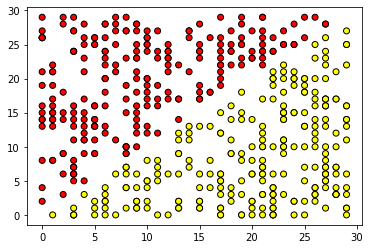

In [3]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(
            x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)


X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black')